# Unsupervised Learning - K-Means Clustering
K-Means clustering is the most popular unsupervised learning algorithm. It is used when we have unlabelled data which is data without defined categories or groups. The algorithm follows an easy or simple way to classify a given data set through a certain number of clusters, fixed apriori. K-Means algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity.

K-Means clustering can be represented diagrammatically as follows:
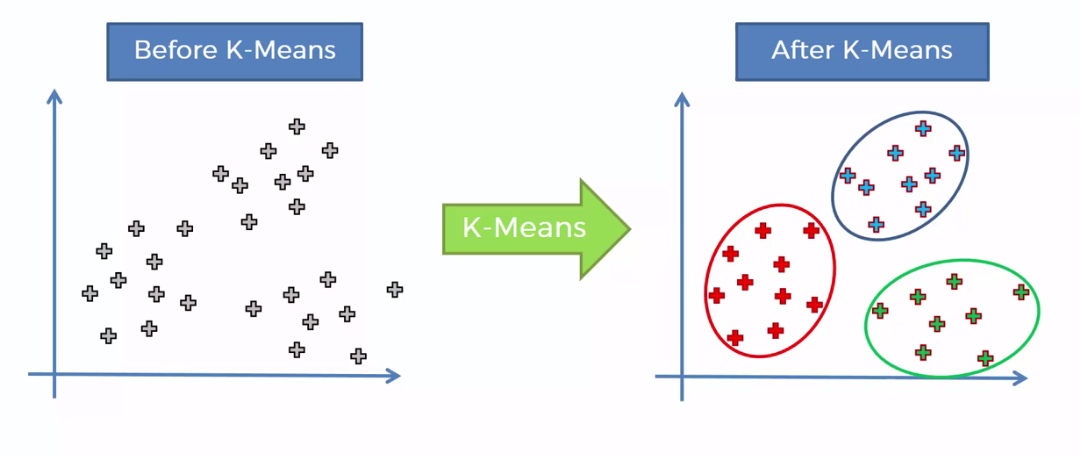

### Iris Dataset
The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.
More info here - https://archive.ics.uci.edu/ml/datasets/iris

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [87]:
iris = pd.read_csv("IRIS.csv")
x = iris.iloc[:, [0, 1, 2, 3]].values

In [88]:
iris.info()
iris[0:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [89]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [90]:
#Frequency distribution of species"
iris_outcome = pd.crosstab(index=iris["species"],  # Make a crosstab
                              columns="count")      # Name the count column

iris_outcome

col_0,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [91]:
iris_setosa=iris.loc[iris["species"]=="Iris-setosa"]
iris_virginica=iris.loc[iris["species"]=="Iris-virginica"]
iris_versicolor=iris.loc[iris["species"]=="Iris-versicolor"]

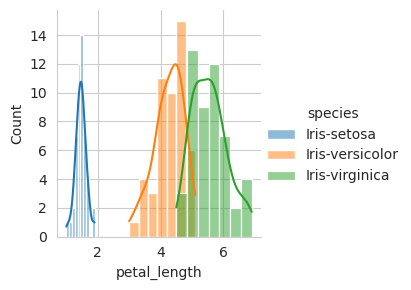

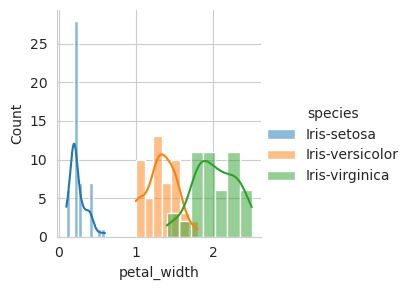

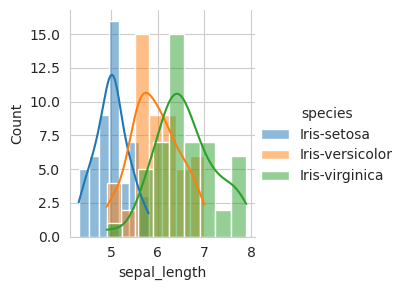

In [92]:
sns.FacetGrid(iris, hue="species", height=3).map(sns.histplot, "petal_length", kde=True).add_legend()
sns.FacetGrid(iris, hue="species", height=3).map(sns.histplot, "petal_width", kde=True).add_legend()
sns.FacetGrid(iris, hue="species", height=3).map(sns.histplot, "sepal_length", kde=True).add_legend()
plt.show()

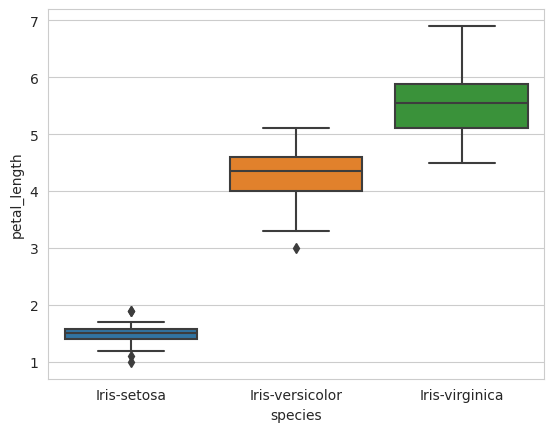

In [93]:
sns.boxplot(x="species",y="petal_length",data=iris)
plt.show()

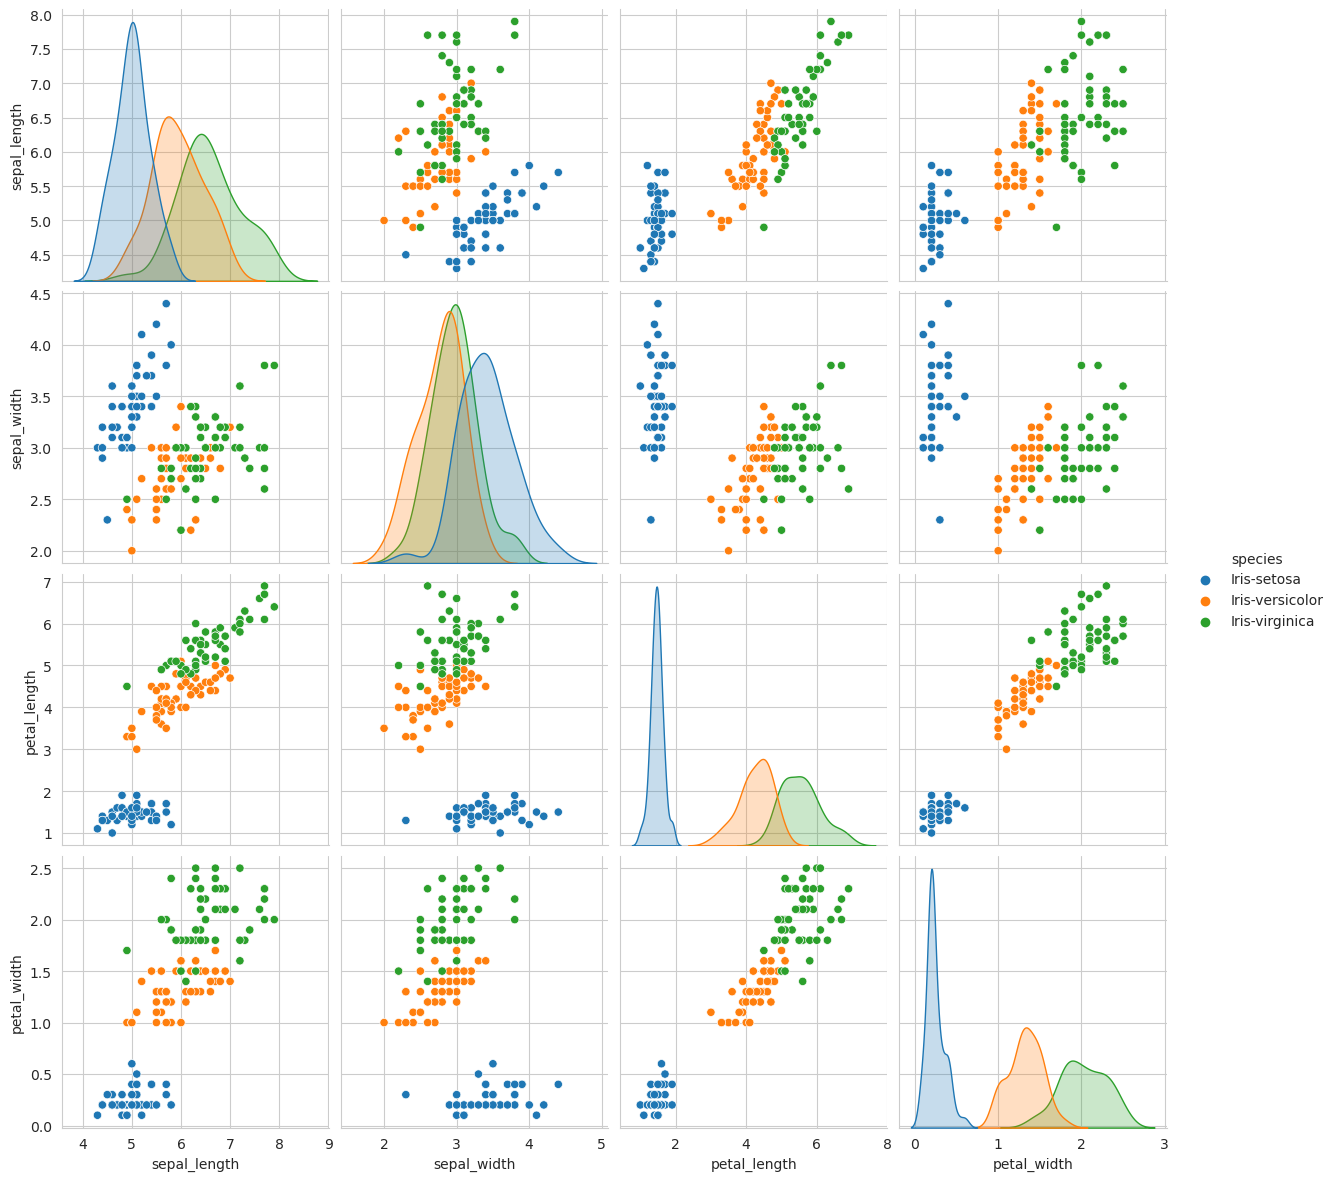

In [94]:
sns.set_style("whitegrid")
sns.pairplot(iris,hue="species",height=3);
plt.show()

### K-Means


In [95]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7efc8ebafdc0>
Traceback (most recent call last):
  File "/home/andy/Apps/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/andy/Apps/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/andy/Apps/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/andy/Apps/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7efc8ebafdc0>
Traceback (most recent call last):
  File "/home/andy/Apps/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/andy/Apps/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/andy/Apps/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/andy/Apps/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


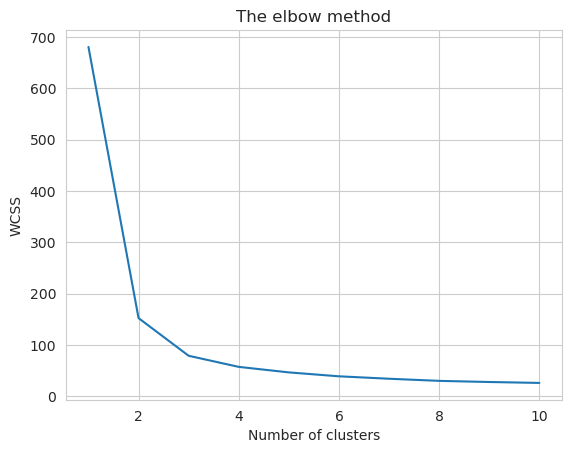

In [96]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [97]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [98]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

plt.legend()

# Exercise 1

1. Create a 2D plot where you visualize the clusters in a petal length vs petal width plot.

2. Create a 2D plot where you visualize the clusters in sepal length vs sepal width plot.

Which of the plots shows a better separation of the data?

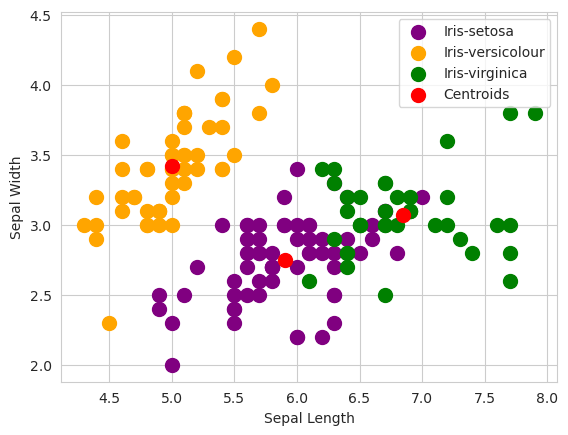

In [99]:
plt.show()

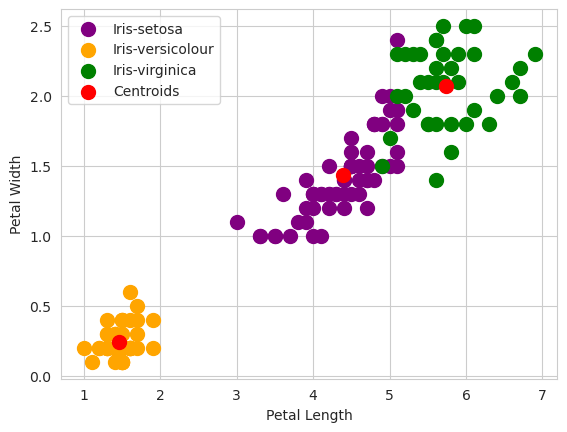

In [100]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 2], x[y_kmeans == 0, 3], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 2], x[y_kmeans == 1, 3], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 2], x[y_kmeans == 2, 3], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], s = 100, c = 'red', label = 'Centroids')

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

plt.legend()

plt.show()

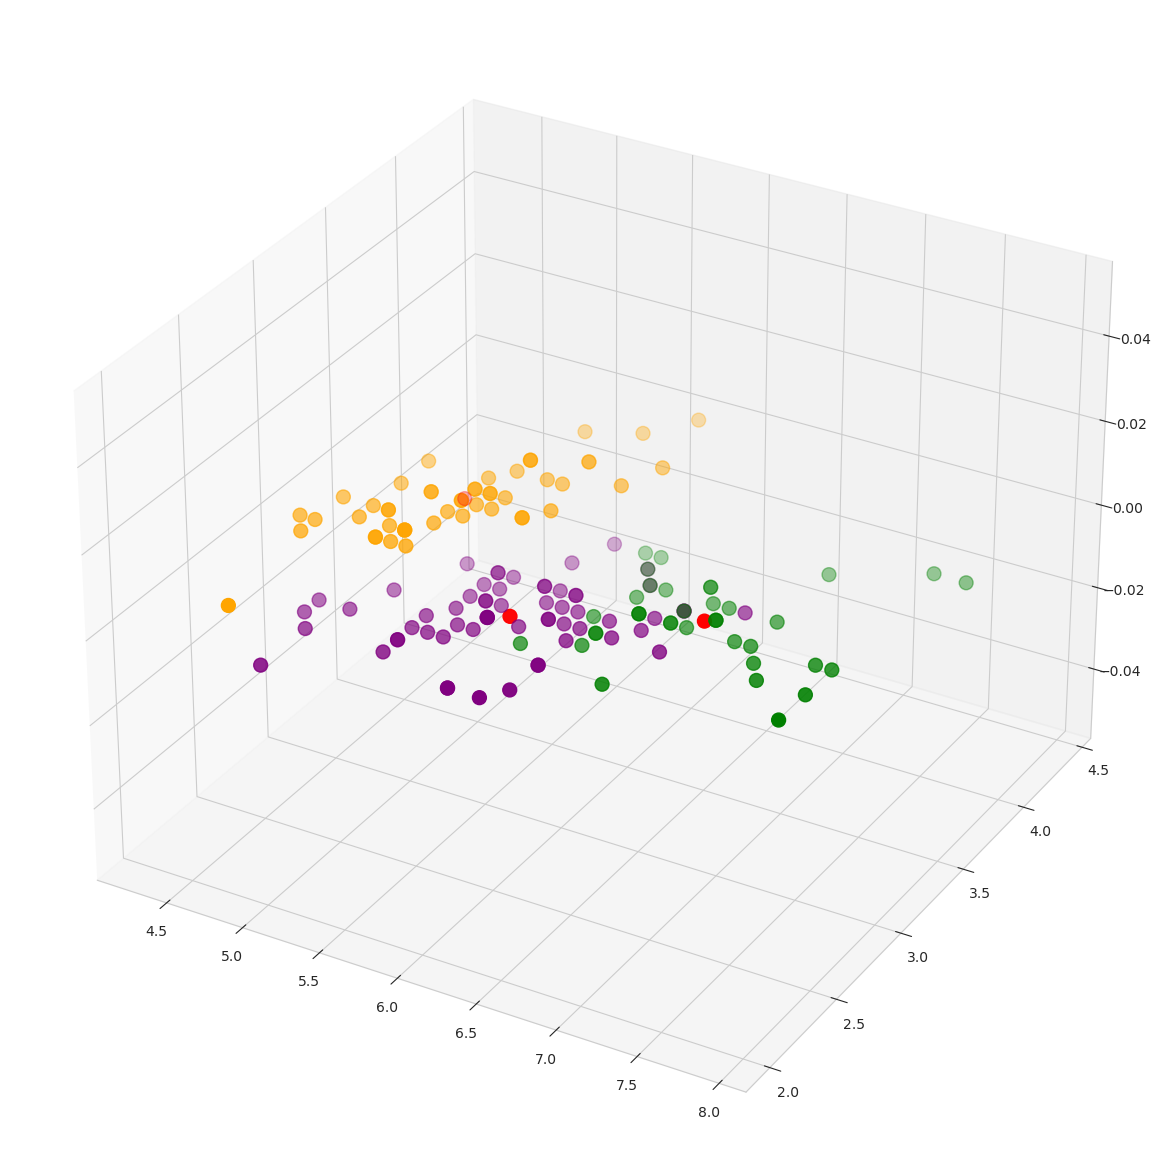

In [101]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.show()

# Text Clustering


For this example we will use Scikit-Learn’s API, sklearn.datasets, which allows us to access a famous dataset for linguistic analysis, the 20newsgroups dataset. A newsgroup is an online user discussion group, such as a forum. Sklearn allows us to access different categories of content. We will use texts that have to do with technology, religion and sport.

In [102]:
# import the dataset from sklearn
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# import other required libs
import pandas as pd
import numpy as np

# string manipulation libs
import re
import string
import nltk
from nltk.corpus import stopwords

# viz libs
import matplotlib.pyplot as plt
import seaborn as sns


categories = [
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'alt.atheism',
 'soc.religion.christian',
]
dataset = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, remove=('headers', 'footers', 'quotes'))
df = pd.DataFrame(dataset.data, columns=["corpus"])
df

,corpus
0,"\nThey tried their best not to show it, believ..."
1,\nStankiewicz? I doubt it.\n\nKoufax was one ...
2,\n[deletia- and so on]\n\nI seem to have been ...
3,"Excuse the sheer newbieness of this post, but ..."
4,==============================================...
...,...
3446,"\n Or, with no dictionary available, they cou..."
3447,\n\nSorry to disappoint you but the Red Wings ...
3448,\n: Can anyone tell me where to find a MPEG vi...
3449,\n


### Preprocessing

This step will take ~1 minute to run

In [103]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

stopwords.words("english")[:10] # <-- import the english stopwords

def preprocess_text(text: str, remove_stopwords: bool) -> str:
    """This utility function sanitizes a string by:
    - removing links
    - removing special characters
    - removing numbers
    - removing stopwords
    - transforming in lowercase
    - removing excessive whitespaces
    Args:
        text (str): the input text you want to clean
        remove_stopwords (bool): whether or not to remove stopwords
    Returns:
        str: the cleaned text
    """

    # remove links
    text = re.sub(r"http\S+", "", text)
    # remove special chars and numbers
    text = re.sub("[^A-Za-z]+", " ", text)
    # remove stopwords
    if remove_stopwords:
        # 1. tokenize
        tokens = nltk.word_tokenize(text)
        # 2. check if stopword
        tokens = [w for w in tokens if not w.lower() in stopwords.words("english")]
        # 3. join back together
        text = " ".join(tokens)
    # return text in lower case and stripped of whitespaces
    text = text.lower().strip()
    return text

df['cleaned'] = df['corpus'].apply(lambda x: preprocess_text(x, remove_stopwords=True))
df

[nltk_data] Downloading package stopwords to /home/andy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/andy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,corpus,cleaned
0,"\nThey tried their best not to show it, believ...",tried best show believe surprised find sprint ...
1,\nStankiewicz? I doubt it.\n\nKoufax was one ...,stankiewicz doubt koufax one two jewish hofs h...
2,\n[deletia- and so on]\n\nI seem to have been ...,deletia seem rather unclear asking please show...
3,"Excuse the sheer newbieness of this post, but ...",excuse sheer newbieness post looking decent pa...
4,==============================================...,
...,...,...
3446,"\n Or, with no dictionary available, they cou...",dictionary available could gain first hand kno...
3447,\n\nSorry to disappoint you but the Red Wings ...,sorry disappoint red wings earned victory easi...
3448,\n: Can anyone tell me where to find a MPEG vi...,anyone tell find mpeg viewer either dos window...
3449,\n,


### TF-IDF Vectorization

Vectorization is the act of converting data into a numerical format in such a way that a statistical model can interpret it.

The TF-IDF converts our corpus into a numerical format by bringing out specific terms, weighing very rare or very common terms differently in order to assign them the appropriate score.

In [104]:
# initialize the vectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
# fit_transform applies TF-IDF to clean texts - we save the array of vectors in X
X = vectorizer.fit_transform(df['cleaned'])
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

First step of K-means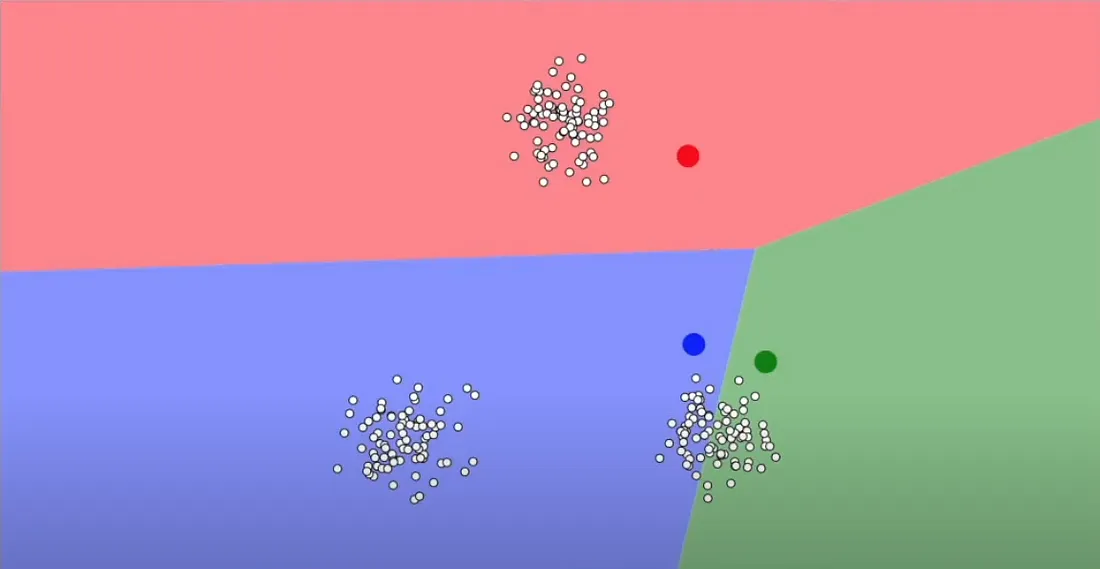

In [105]:
from sklearn.cluster import KMeans

# initialize kmeans with 3 centroids
kmeans = KMeans(n_clusters=3, random_state=42)
# fit the model
kmeans.fit(X)
# store cluster labels in a variable
clusters = kmeans.labels_
print(len(clusters), clusters)

3451 [0 0 2 ... 1 0 0]


End of K-means
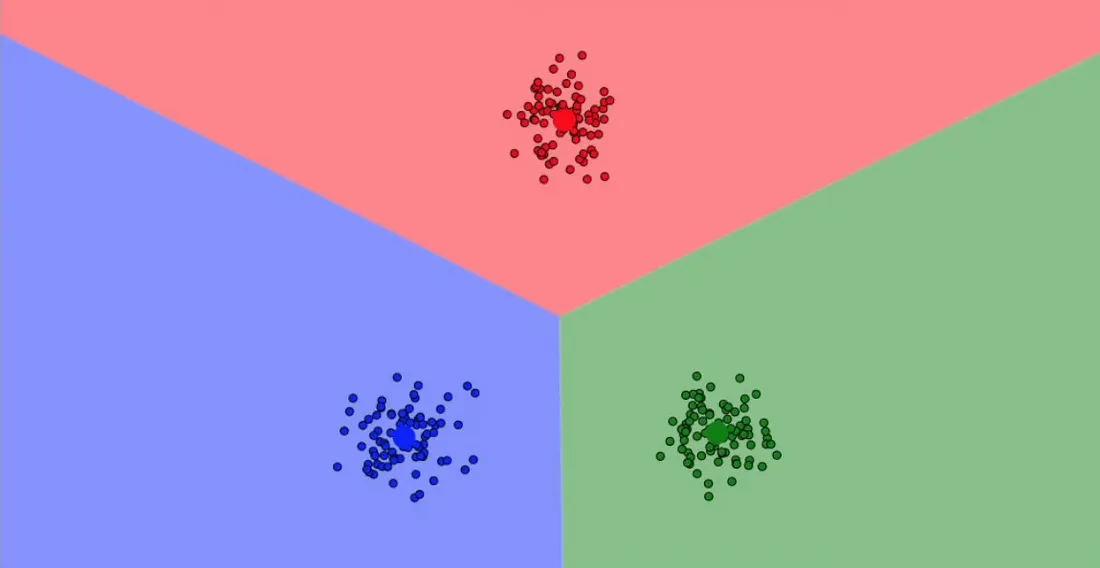

### Dimensional Reduction and Visualization
We have our X from the TF-IDF and we have a KMeans model and related clusters. Now we want to put these two pieces together to visualize the relation between text and group.

As we know, a graph is usually presented in 2 dimensions and rarely in 3. Surely we cannot visualize more. If we look at the dimensionality of X with X.shape we see that it is (3451, 7390). There are 3451 vectors (one for each text), each with 7390 dimensions. It is definitely impossible to visualize them.

Fortunately for us, there is a technique called PCA (Principal Component Analysis) which reduces the dimensionality of a data set to an arbitrary number while preserving most of the information contained in it.

Our X will go from 7390 in size to 2.



In [106]:
print(X.shape)

(3451, 7390)


In [107]:
from sklearn.decomposition import PCA

# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(X.toarray())
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

If we now check the dimensionality of x0 and x1 we see that they are respectively (3451,), so one point (x0, x1) for each text. This enables us to create a scatter chart.

In [108]:
print(x0.shape)
print(x1.shape)

(3451,)
(3451,)


In [109]:
# assign clusters and pca vectors to our dataframe 
df['cluster'] = clusters
df['x0'] = x0
df['x1'] = x1
df

,corpus,cleaned,cluster,x0,x1
0,"\nThey tried their best not to show it, believ...",tried best show believe surprised find sprint ...,0,-0.001520,-0.004300
1,\nStankiewicz? I doubt it.\n\nKoufax was one ...,stankiewicz doubt koufax one two jewish hofs h...,0,-0.036450,-0.039145
2,\n[deletia- and so on]\n\nI seem to have been ...,deletia seem rather unclear asking please show...,2,-0.065480,0.087853
3,"Excuse the sheer newbieness of this post, but ...",excuse sheer newbieness post looking decent pa...,1,0.164120,0.062958
4,==============================================...,,0,0.035573,-0.038288
...,...,...,...,...,...
3446,"\n Or, with no dictionary available, they cou...",dictionary available could gain first hand kno...,0,-0.010061,-0.010073
3447,\n\nSorry to disappoint you but the Red Wings ...,sorry disappoint red wings earned victory easi...,0,-0.029921,-0.158443
3448,\n: Can anyone tell me where to find a MPEG vi...,anyone tell find mpeg viewer either dos window...,1,0.188832,0.057185
3449,\n,,0,0.035573,-0.038288


Let’s see which are the most relevant keywords for each centroid so that we can rename each cluster with a better label

In [110]:
def get_top_keywords(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(X.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster
    terms = vectorizer.get_feature_names_out() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score
            
get_top_keywords(10)


Cluster 0
good,last,games,like,would,year,think,one,team,game

Cluster 1
please,dos,use,know,program,anyone,files,file,thanks,windows

Cluster 2
christians,say,think,bible,believe,jesus,one,would,people,god


The KMeans has correctly created 3 distinct groups, one for each category present in the dataset. 

    Cluster 0 refers to religion
    cluster 1 to tech
    cluster 2 to sport. 

Let’s apply the mapping.

In [111]:
# map clusters to appropriate labels 
cluster_map = {0: "sport", 1: "tech", 2: "religion"}
# apply mapping
df['cluster'] = df['cluster'].map(cluster_map)

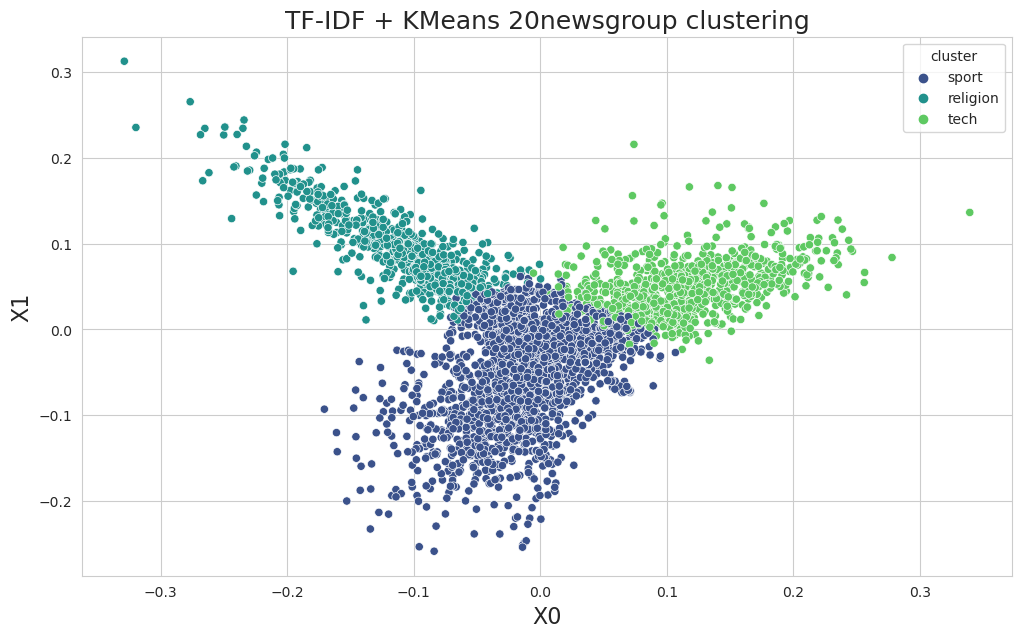

In [112]:
# set image size
plt.figure(figsize=(12, 7))
# set a title
plt.title("TF-IDF + KMeans 20newsgroup clustering", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=df, x='x0', y='x1', hue='cluster', palette="viridis")
plt.show()

As we can see, the clustering activity worked well: the algorithm found three distinct groups as we expected knowing our dataset. You can now go on and use this approach in finding clusters in unlabeled data.

The interpretation is quite simple: there are no particular anomalies, except for the fact that there are texts belonging to the technology category that overlap slightly with those belonging to sport, between the dark blue and bright green border. This is due to the presence of common terms among some of these texts which, when vectorized, obtain equal values for some dimensions.

# Exercise 2
Choose different text data from at least 3 other categories present in fetch_20newsgroups (or from any other data of your choice - e.g. books, news articles, etc.).

Perform k-means clustering and visualization on this data.

In [113]:
categories = [
    'sci.med', 
    'talk.politics.guns',
    'comp.sys.ibm.pc.hardware',
]

dataset = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, remove=('headers', 'footers', 'quotes'))
df = pd.DataFrame(dataset.data, columns=["corpus"])
df

,corpus
0,
1,\nI knew that Cutie would sell us out. Full-b...
2,"}>Look, if you can figure out a reliable means..."
3,Can anyone provide information on CS chemical ...
4,I do not think it is at all unlikely that Clin...
...,...
1725,"Hi everyone,\n\tI have a question regarding my..."
1726,\nWhy thanks for your reply to my post. By th...
1727,"com\n\n\n\nOn a DA revolver, you get another t..."
1728,/ iftccu:talk.politics.guns / hays@ssd.intel.c...


In [126]:
df['cleaned'] = df['corpus'].apply(lambda x: preprocess_text(x, remove_stopwords=True))
df

,corpus,cleaned,cluster,x0,x1
0,,,NaN,-0.006076,-0.003139
1,\nI knew that Cutie would sell us out. Full-b...,knew cutie would sell us full blooded democrat...,NaN,-0.027124,-0.068547
2,"}>Look, if you can figure out a reliable means...",look figure reliable means keeping guns away b...,NaN,-0.032564,-0.100328
3,Can anyone provide information on CS chemical ...,anyone provide information cs chemical agent t...,NaN,-0.019776,-0.030231
4,I do not think it is at all unlikely that Clin...,think unlikely clinton ro policy wonk facilita...,NaN,-0.014153,-0.113607
...,...,...,...,...,...
1725,"Hi everyone,\n\tI have a question regarding my...",hi everyone question regarding stack pc progra...,NaN,-0.039363,0.039005
1726,\nWhy thanks for your reply to my post. By th...,thanks reply post way never never ever said ri...,NaN,-0.026017,-0.086078
1727,"com\n\n\n\nOn a DA revolver, you get another t...",com da revolver get another try misfire pistol...,NaN,-0.025477,-0.044442
1728,/ iftccu:talk.politics.guns / hays@ssd.intel.c...,iftccu talk politics guns hays ssd intel com k...,NaN,-0.029412,-0.087399


In [127]:
# initialize the vectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
# fit_transform applies TF-IDF to clean texts - we save the array of vectors in X
X = vectorizer.fit_transform(df['cleaned'])
X.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.02906974,
        0.        ]])

In [128]:
# initialize kmeans with 3 centroids
kmeans = KMeans(n_clusters=3, random_state=42)
# fit the model
kmeans.fit(X)
# store cluster labels in a variable
clusters = kmeans.labels_
print(len(clusters), clusters)

1730 [1 1 1 ... 1 1 2]


In [129]:
print(X.shape)

(1730, 4404)


In [130]:
from sklearn.decomposition import PCA

# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(X.toarray())
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

In [131]:
print(x0.shape)
print(x1.shape)

(1730,)
(1730,)


In [132]:
# assign clusters and pca vectors to our dataframe 
df['cluster'] = clusters
df['x0'] = x0
df['x1'] = x1
df

,corpus,cleaned,cluster,x0,x1
0,,,1,-0.006076,-0.003139
1,\nI knew that Cutie would sell us out. Full-b...,knew cutie would sell us full blooded democrat...,1,-0.027124,-0.068547
2,"}>Look, if you can figure out a reliable means...",look figure reliable means keeping guns away b...,1,-0.032564,-0.100328
3,Can anyone provide information on CS chemical ...,anyone provide information cs chemical agent t...,1,-0.019776,-0.030231
4,I do not think it is at all unlikely that Clin...,think unlikely clinton ro policy wonk facilita...,1,-0.014153,-0.113607
...,...,...,...,...,...
1725,"Hi everyone,\n\tI have a question regarding my...",hi everyone question regarding stack pc progra...,1,-0.039363,0.039005
1726,\nWhy thanks for your reply to my post. By th...,thanks reply post way never never ever said ri...,1,-0.026017,-0.086078
1727,"com\n\n\n\nOn a DA revolver, you get another t...",com da revolver get another try misfire pistol...,1,-0.025477,-0.044442
1728,/ iftccu:talk.politics.guns / hays@ssd.intel.c...,iftccu talk politics guns hays ssd intel com k...,1,-0.029412,-0.087399


In [133]:
def get_top_keywords(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(X.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster
    terms = vectorizer.get_feature_names_out() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score
            
get_top_keywords(10)


Cluster 0
surrender,pitt,geb,skepticism,jxp,intellect,chastity,cadre,shameful,dsl

Cluster 1
time,also,gun,think,know,like,get,people,one,would

Cluster 2
pc,system,ide,mb,thanks,scsi,bus,controller,card,drive


In [134]:
# map clusters to appropriate labels 
cluster_map = {0: "med", 1: "guns", 2: "hardware"}
# apply mapping
df['cluster'] = df['cluster'].map(cluster_map)

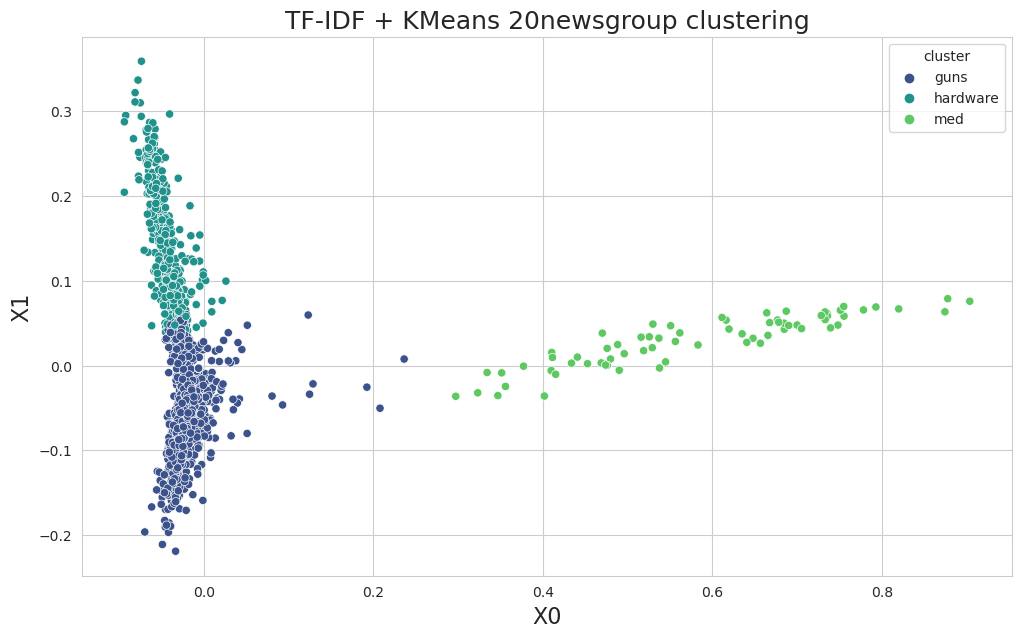

In [135]:
# set image size
plt.figure(figsize=(12, 7))
# set a title
plt.title("TF-IDF + KMeans 20newsgroup clustering", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=df, x='x0', y='x1', hue='cluster', palette="viridis")
plt.show()